In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt#visualização de dados;

In [2]:
datasetTreino= pd.read_csv('Abandono_clientes.csv')
datasetPredict= pd.read_csv('Abandono_teste.csv')

In [3]:
datasetTreino.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
datasetPredict.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15
5,10006,15645057,Mackenzie,776,France,Male,29,4,0.00,2,0,1,88440.83
6,10007,15687377,Sharpe,585,France,Male,25,7,159301.00,1,1,1,39824.96
7,10008,15795593,Chuang,651,Germany,Male,24,5,158484.85,1,1,1,161234.90
8,10009,15751848,Seely,672,France,Male,45,7,0.00,2,0,0,174177.96
9,10010,15702792,Chienezie,527,France,Male,23,8,0.00,2,1,0,76589.04


In [5]:
pd.DataFrame.info(datasetTreino)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
pd.DataFrame.info(datasetPredict)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 101.7+ KB


In [7]:
datasetTreino.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


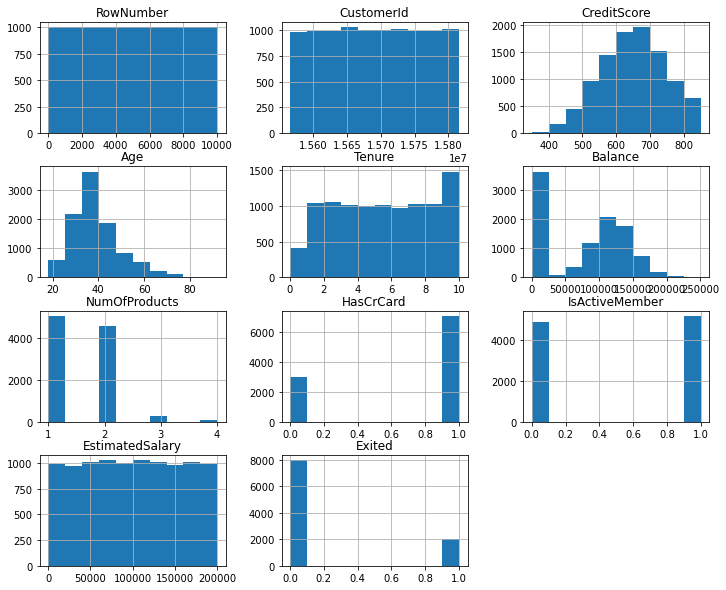

In [8]:
datasetTreino.hist(figsize=(12,10));

array([<AxesSubplot:title={'center':'CreditScore'}>,
       <AxesSubplot:title={'center':'Balance'}>,
       <AxesSubplot:title={'center':'Age'}>,
       <AxesSubplot:title={'center':'EstimatedSalary'}>,
       <AxesSubplot:title={'center':'Tenure'}>,
       <AxesSubplot:title={'center':'NumOfProducts'}>], dtype=object)

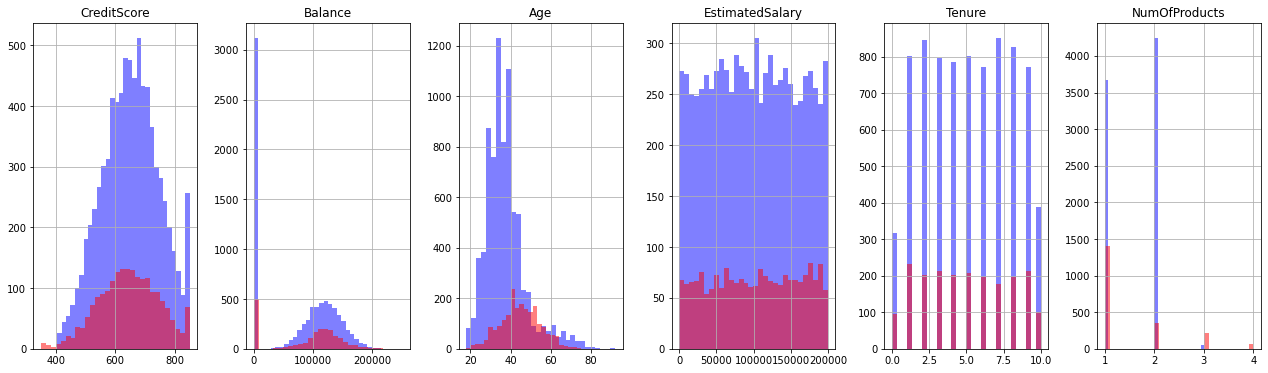

In [9]:
datasetTreino['Exited']=datasetTreino['Exited']
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
datasetTreino[datasetTreino.Exited == 0][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
datasetTreino[datasetTreino.Exited == 1][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax)

In [10]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

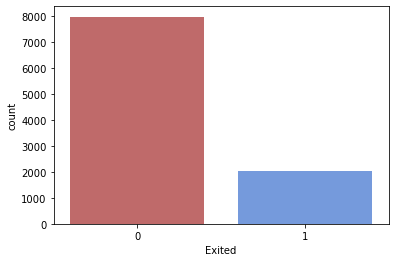

In [11]:
datasetTreino['Exited']=datasetTreino['Exited']
sns.countplot(data=datasetTreino,x='Exited',palette=cols);

In [12]:
datasetTreino['Exited'].sum()/datasetTreino['Exited'].count()

0.2037

In [13]:
datasetTreino_plot = datasetTreino.groupby ('Gender'). Exited.mean (). reset_index () 
datasetTreino_plot

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


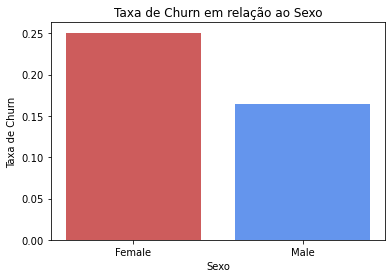

In [14]:
#Sexo em relação a variável churn
x =datasetTreino_plot['Gender']
y=datasetTreino_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');



In [15]:
datasetTreino['Geography']=datasetTreino['Geography']

In [16]:
datasetTreino_plot = datasetTreino.groupby ('Geography'). Exited.mean (). reset_index () 
datasetTreino_plot

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


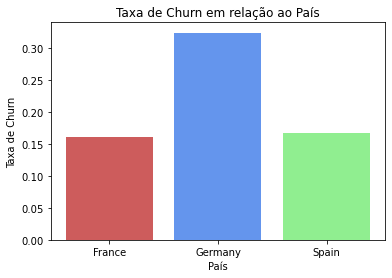

In [17]:
#País em relação a variável churn
x =datasetTreino_plot['Geography']
y=datasetTreino_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

In [18]:
datasetTreino['HasCrCard']=datasetTreino['HasCrCard']

In [19]:
datasetTreino_plot = datasetTreino.groupby ('HasCrCard'). Exited.mean (). reset_index () 
datasetTreino_plot

,HasCrCard,Exited
0,0,0.208149
1,1,0.201843


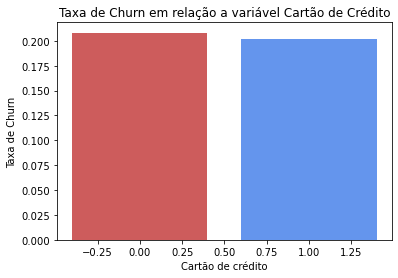

In [20]:
#Carão de crédito em relação a variável churn
x =datasetTreino_plot['HasCrCard']
y=datasetTreino_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

In [21]:
datasetTreino['IsActiveMember']=datasetTreino['IsActiveMember']
datasetTreino_plot = datasetTreino.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
datasetTreino_plot

,IsActiveMember,Exited
0,0,0.268509
1,1,0.142691


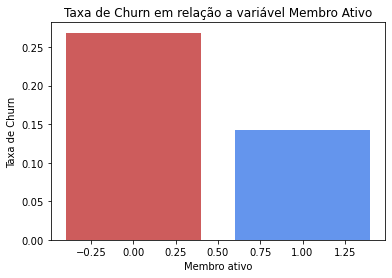

In [22]:
#Membro ativo em relação a variável churn
x =datasetTreino_plot['IsActiveMember']
y=datasetTreino_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

In [23]:
datasetTreino_cont=datasetTreino[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
datasetTreino_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


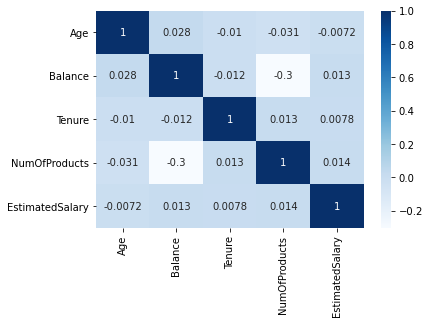

In [24]:
sns.heatmap(datasetTreino_cont.corr(),annot = True,cmap='Blues');

In [25]:
datasetTreino_plot = datasetTreino.groupby ('NumOfProducts').Exited.mean(). reset_index () 
datasetTreino_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


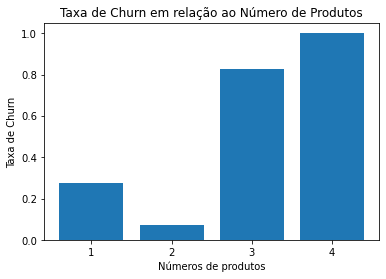

In [26]:
#Número de produtos em relação a variável churn
x =datasetTreino_plot['NumOfProducts']
y=datasetTreino_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

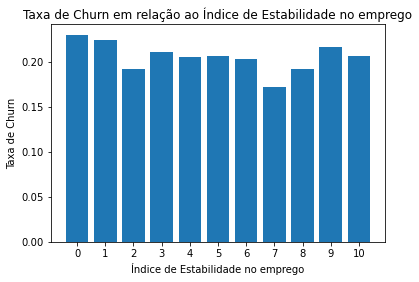

In [27]:
datasetTreino_plot = datasetTreino.groupby ('Tenure'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =datasetTreino_plot['Tenure']
y=datasetTreino_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

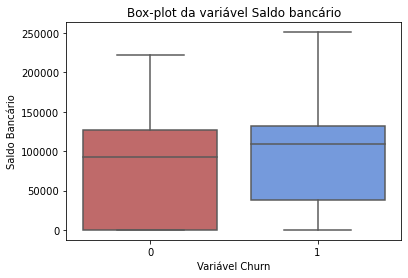

In [28]:
#box-plot salto bancario em relação ao Churn
cols= [myred, myblue,mygreen]
sns.boxplot(x="Exited", y="Balance", data=datasetTreino,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
datasetTreino.groupby(['Exited'])['Balance'].mean()



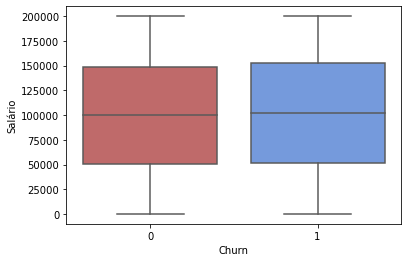

In [29]:
#box-plot salario pela variável churn

sns.boxplot(x="Exited", y="EstimatedSalary" , data=datasetTreino,palette=cols);
datasetTreino.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

Text(0, 0.5, 'Taxa de Churn')

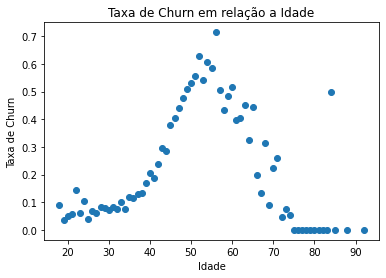

In [30]:
datasetTreino_plot = datasetTreino.groupby ('Age'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x = datasetTreino_plot['Age']
y = datasetTreino_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

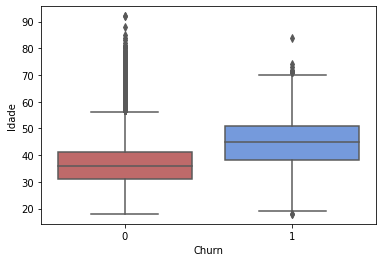

In [31]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited", y="Age" , data=datasetTreino,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
datasetTreino.groupby(['Exited'])['Age'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

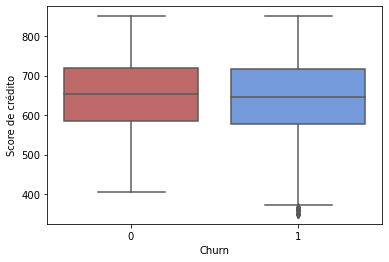

In [32]:
#box-plot score do cliente em relação ao churn

sns.boxplot(x="Exited", y="CreditScore" , data=datasetTreino,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
datasetTreino.groupby(['Exited'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

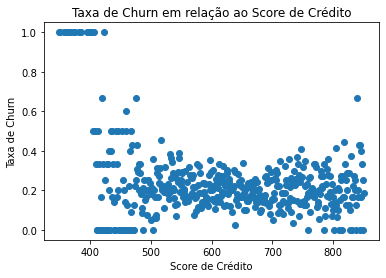

In [33]:
#Número de produtos em relação a variável churn
datasetTreino_plot = datasetTreino.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =datasetTreino_plot['CreditScore']
y=datasetTreino_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

In [34]:
datasetTreino1 = datasetTreino.drop(columns = ['RowNumber','CustomerId','Surname'])
datasetTreino1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [35]:
#Contato número de observações faltantes no dataset para cada variável
datasetTreino1.isnull().sum() 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64